In [12]:
import pandas as pd
import seaborn as sb
import glob
import joblib
import numpy as np

In [ ]:
# Per sample numbers

In [11]:
all_dfs = glob.glob("persamp_varnumbers/*jl")
chrom_persample = [joblib.load(_) for _ in all_dfs]

In [14]:
sample_sum = {}
for chrom in chrom_persample:
    for sample, values in chrom.items():
        if sample not in sample_sum:
            sample_sum[sample] = values
        else:
            sample_sum[sample] += values

In [27]:
sample_sum['HG00096'][:,:4].sum()

7506675

In [37]:
s = sample_sum['HG00096'][:, :4]
s[1] / s.sum(axis=0)

array([0.20591961, 0.35057034, 0.65898265, 0.71786304, 0.49732879])

In [28]:
vars_per_sample = pd.DataFrame(
                        [[k, v[:, :4].sum()] for k,v in sample_sum.items()],
                        columns=['sample', 'tot_vars']
                    )
vars_per_sample

,sample,tot_vars
0,HG00096,7506675
1,HG00171,7716979
2,HG00512,7950401
3,HG00513,7949054
4,HG00514,9854081
...,...,...
81,NA21309,7080185
82,li:HG00733,6550635
83,li:NA12878,6269644
84,li:NA24385,6307540


In [120]:
tr_vars_per_sample = pd.DataFrame(
                        [[k, v[1, :4].sum()] for k,v in sample_sum.items()],
                        columns=['sample', 'tot_vars']
                    )
tr_vars_per_sample

,sample,tot_vars
0,HG00096,1811460
1,HG00171,1894773
2,HG00512,1857063
3,HG00513,1890328
4,HG00514,2239416
...,...,...
81,NA21309,1792248
82,li:HG00733,1668579
83,li:NA12878,1579809
84,li:NA24385,1597005


In [30]:
vars_per_sample['tot_vars'].describe().astype(int)

count          86
mean      7250447
std        994311
min       5774879
25%       6258978
50%       7250783
75%       7765342
max      10227465
Name: tot_vars, dtype: int64

In [123]:
def pct_tr(d):
    s = d[:, :4]
    return s[1].sum() / s.sum()

pct_tr_per_sample = pd.DataFrame(
                        [[k, pct_tr(v)] for k,v in sample_sum.items()],
                        columns=['sample', 'pct_tr']
                    )
pct_tr_per_sample

,sample,pct_tr
0,HG00096,0.241313
1,HG00171,0.245533
2,HG00512,0.233581
3,HG00513,0.237805
4,HG00514,0.227258
...,...,...
81,NA21309,0.253136
82,li:HG00733,0.254720
83,li:NA12878,0.251977
84,li:NA24385,0.253190


In [39]:
def pct_tr_type(k, d):
    ret = list(d[1] / d.sum(axis=0))
    ret.insert(0, k)
    return ret

pct_tr_per_sample = pd.DataFrame(
                        [pct_tr_type(k, v) for k,v in sample_sum.items()],
                        columns=['sample', 'snp', 'five', 'fifty', 'sv', 'len']
                    )
pct_tr_per_sample

,sample,snp,five,fifty,sv,len
0,HG00096,0.205920,0.350570,0.658983,0.717863,0.497329
1,HG00171,0.211059,0.357604,0.663484,0.711061,0.485174
2,HG00512,0.198931,0.332674,0.659010,0.702700,0.462575
3,HG00513,0.202685,0.351580,0.662701,0.708800,0.471683
4,HG00514,0.205112,0.251086,0.658276,0.703133,0.444972
...,...,...,...,...,...,...
81,NA21309,0.212807,0.380759,0.669610,0.727189,0.470844
82,li:HG00733,0.217738,0.377267,0.668760,0.735432,0.507921
83,li:NA12878,0.213776,0.376909,0.667226,0.738703,0.489362
84,li:NA24385,0.212839,0.379759,0.665112,0.738439,0.518887


In [40]:
pct_tr_per_sample.describe()

,snp,five,fifty,sv,len
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.212091,0.366297,0.666016,0.722369,0.464789
std,0.006840,0.025523,0.005652,0.011762,0.022267
min,0.189031,0.251086,0.654101,0.691322,0.401017
25%,0.208962,0.360253,0.661121,0.714486,0.450411
50%,0.214178,0.378982,0.668138,0.725985,0.465788
75%,0.216863,0.381000,0.670546,0.730871,0.481645
max,0.221400,0.386498,0.674651,0.739112,0.518887


In [3]:
pvcf = pd.read_csv("TRcatalog_pVCFcounts.txt.gz", sep='\t')

In [4]:
genome = pd.read_csv("genome_pVCFcounts.txt", sep='\t')

In [5]:
genome.sum()

chrom          chr1chr2chr3chr4chr5chr6chr7chr8chr9chr10chr11...
snp                                                    106410565
five                                                    14421648
fifty                                                    3138977
sv                                                        763953
total_len                                             1185371549
total_count                                            124735143
dtype: object

In [6]:
tots_g = genome.drop(columns=['chrom']).sum()
tots_p = pvcf.drop(columns=['chrom', 'start', 'end']).sum()

In [7]:
tots_p / tots_g

snp            0.182234
five           0.259509
fifty          0.697908
sv             0.742466
total_len      0.410679
total_count    0.207577
dtype: float64

In [8]:
tots_p

snp             19391644
five             3742549
fifty            2190718
sv                567209
total_len      486807444
total_count     25892120
dtype: int64

In [19]:
pvcf['total_count'].sum()

25892120

In [5]:
(pvcf['total_count'] == 0).mean()

0.2724349564433966

# What percent of the TR regions have no variants
- no variants at all
- no non-snps
- no variants >= 5bp

In [41]:
pvcf

,chrom,start,end,snp,five,fifty,sv,total_len,total_count
0,chr1,9975,10498,1165,54,5,3,491,1227
1,chr1,10602,11025,651,18,7,15,2684,691
2,chr1,11195,11472,91,7,0,0,7,98
3,chr1,15797,15871,14,4,0,0,4,18
4,chr1,16687,16768,11,4,2,0,24,17
...,...,...,...,...,...,...,...,...,...
1784799,chrY,56881152,56881235,14,6,5,0,51,25
1784800,chrY,56884295,56884465,227,12,13,0,205,252
1784801,chrY,56884637,56884703,109,2,0,0,2,111
1784802,chrY,56885593,56885665,89,3,0,0,5,92


In [43]:
pvcf.head()[['five', 'fifty', 'sv']].sum(axis=1)

0    62
1    40
2     7
3     4
4     6
dtype: int64

In [44]:
print('none at all', (pvcf['total_count'] == 0).mean())
print('no non-snps', (pvcf[['five', 'fifty', 'sv']].sum(axis=1) == 0).mean())
print('no >=5bp', (pvcf[['fifty', 'sv']].sum(axis=1) == 0).mean())

none at all 0.2724349564433966
no non-snps 0.4745254941158805
no >=5bp 0.810680612549053


In [76]:
# Total span of TR regions with any variation
with_any = pvcf[(pvcf[['fifty', 'sv']].sum(axis=1) != 0)]

In [77]:
(with_any['end'] - with_any['start']).sum() / 2_923_715_986

0.03035558495591849

In [53]:
tots_p[['fifty', 'sv']].sum() / tots_g[['fifty', 'sv']].sum()

0.706629890876854

In [74]:
with_any[['chrom', 'start', 'end']].to_csv('TR_with_any_variant.bed', sep='\t', header=False, index=False)

In [78]:
without_any = pvcf[(pvcf[['fifty', 'sv']].sum(axis=1) == 0)]
without_any[['chrom', 'start', 'end']].to_csv('TR_without_any_variant.bed', sep='\t', header=False, index=False)

In [81]:
all_tr = pd.read_csv("../../regions/adotto_TRregions_v1.1.bed", sep='\t')

In [83]:
all_tr = all_tr.rename(columns={'chr':'chrom'}).set_index(['chrom', 'start', 'end'])

In [128]:
(all_tr['patho'] != '.').sum()

62

In [ ]:
with_any = with_any.set_index(['chrom', 'start', 'end'])
m_with = all_tr.loc[with_any.index]
without_any = without_any.set_index(['chrom', 'start', 'end'])
m_without = all_tr.loc[without_any.index]

In [127]:
(m_without['patho'] != '.').sum()

10

In [126]:
(m_with['patho'] != '.').sum()

52

In [137]:
all_tr['number of variants'] = with_any['total_count']

In [145]:
set_A = all_tr[(all_tr['patho'] == '.') & (all_tr['number of variants'] != 0)].reset_index()
set_B = all_tr[(all_tr['patho'] != '.') & (all_tr['number of variants'] != 0)].reset_index()

In [146]:
set_A['span'] = set_A['end'] - set_A['start']
set_B['span'] = set_B['end'] - set_B['start']

In [147]:
set_A['v per base'] = set_A['number of variants'] / set_A['span']
set_B['v per base'] = set_B['number of variants'] / set_B['span']

<Axes: xlabel='v per base', ylabel='Count'>

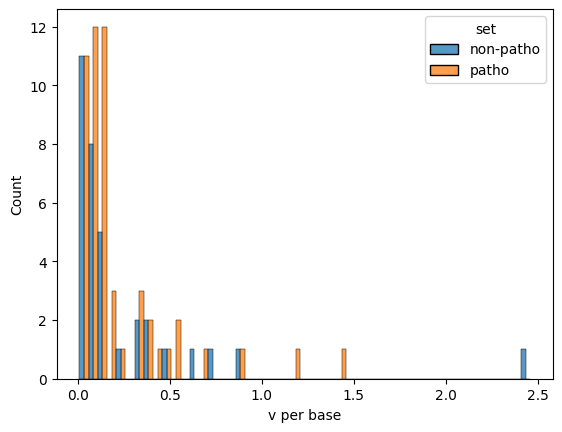

In [160]:
j = set_A[['v per base']].copy().sample(200)
j['set'] = 'non-patho'
k = set_B[['v per base']].copy()
k['set'] = 'patho'
l = pd.concat([j, k]).reset_index()
sb.histplot(data=l, x="v per base", hue='set', multiple='dodge', binwidth=0.05)

<Axes: xlabel='v per base', ylabel='Density'>

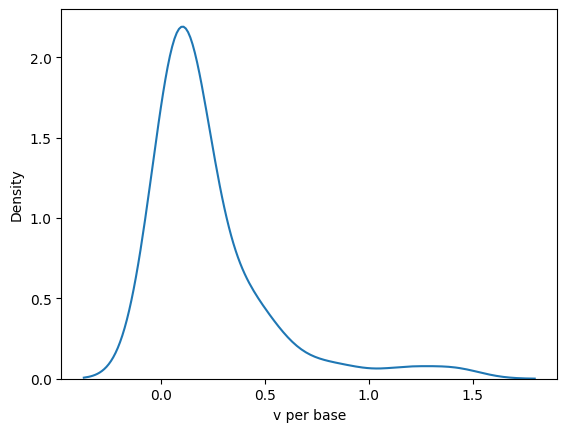

In [151]:
p = sb.kdeplot(data=set_B, x="v per base")

In [148]:
set_A['v per base'].describe()

count    337846.000000
mean          0.192906
std           0.290969
min           0.000969
25%           0.038462
50%           0.094241
75%           0.208333
max           3.613218
Name: v per base, dtype: float64

In [149]:
set_B['v per base'].describe()

count    52.000000
mean      0.224537
std       0.283656
min       0.013201
25%       0.065920
50%       0.125361
75%       0.244635
max       1.413534
Name: v per base, dtype: float64

In [141]:
all_tr[all_tr['patho'] != '.'][['patho', 'number of variants']].describe()

,number of variants
count,52.000000
mean,42.596154
std,79.174728
min,4.000000
25%,12.750000
50%,24.000000
75%,46.250000
max,564.000000


# Checking dbSNP

In [67]:
sub = ['chrom', 'start', 'end']

In [69]:
all_dbsnp = (pd.read_csv("TRcatalog_chr1_dbSNPcounts.txt.gz", sep='\t')
                    .groupby(sub)
                    .sum()
                   .reset_index())
all_dbsnp.drop_duplicates(subset=sub).shape

(145464, 8)

In [71]:
all_dbsnp[(all_dbsnp[['fifty', 'sv']].sum(axis=1) != 0)].shape

(115377, 8)

In [73]:
115377 / (pvcf['chrom'] == 'chr1').sum()

0.791326593599539

In [66]:
common_dbsnp = (pd.read_csv("TRcatalog_chr1_dbSNP_commoncounts.txt.gz", sep='\t')
                    .groupby(sub)
                    .sum()
                   .reset_index()
               )
common_dbsnp.drop_duplicates(subset=sub).shape

(78988, 8)

In [68]:
common_dbsnp[(common_dbsnp[['fifty', 'sv']].sum(axis=1) != 0)].shape

(37968, 8)

In [72]:
37968 / (pvcf['chrom'] == 'chr1').sum()

0.26040795050822346

In [89]:
# Variant count by ancestry
vars_per_sample.head()

,sample,tot_vars
0,HG00096,7506675
1,HG00171,7716979
2,HG00512,7950401
3,HG00513,7949054
4,HG00514,9854081


In [95]:
samp_meta = pd.read_csv("../../metadata/sample_metadata.txt", sep='\t').set_index('individual')
indiv = (pd.read_csv("../../metadata/individual_metadata.txt", sep='\t')
             .rename(columns={"Individual":"individual"})
             .set_index('individual'))
meta = samp_meta.join(indiv).reset_index().set_index(['sample'])

In [98]:
meta['tot_vars'] = vars_per_sample.set_index('sample')['tot_vars']

In [135]:
meta['tot_vars'].min(),meta['tot_vars'].max()

(5774879, 10227465)

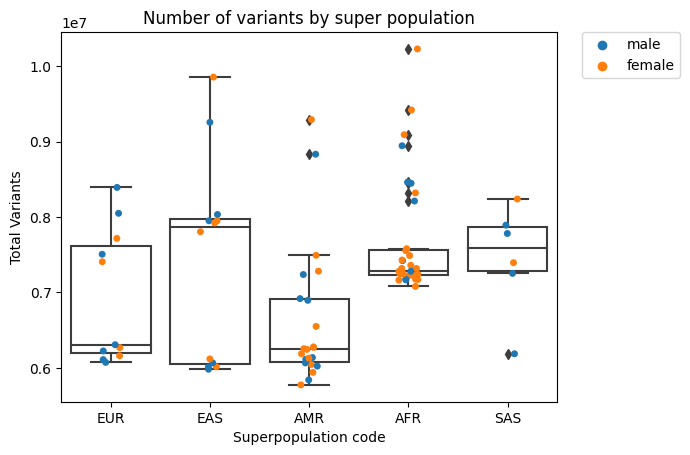

In [133]:
PROPS = {
    'boxprops':{'facecolor':'none'}#, 'edgecolor':'red'},
    #'medianprops':{'color':'green'},
    #'whiskerprops':{'color':'blue'},
    #'capprops':{'color':'yellow'}
}
p = sb.boxplot(data=meta, x="Superpopulation code", y="tot_vars", **PROPS)
p = sb.stripplot(data=meta, x="Superpopulation code", y="tot_vars", hue="Sex")
import matplotlib.pyplot as plt
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
_ = p.set(title="Number of variants by super population", ylabel="Total Variants")


In [131]:
meta[["Superpopulation code", "Superpopulation name"]].value_counts()

Superpopulation code  Superpopulation name
AFR                   African Ancestry        35
AMR                   American Ancestry       22
EAS                   East Asian Ancestry     12
EUR                   European Ancestry       11
SAS                   South Asian Ancestry     6
dtype: int64

[Text(0.5, 1.0, 'Number of variants in TR regions by super pop')]

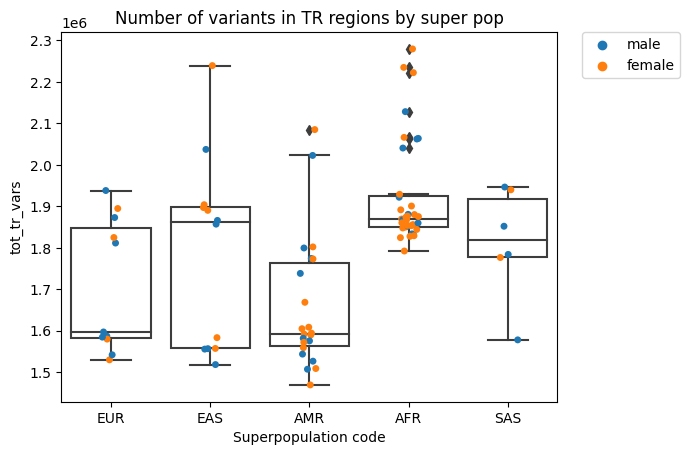

In [121]:
meta['tot_tr_vars'] = tr_vars_per_sample.set_index('sample')['tot_vars']

PROPS = {
    'boxprops':{'facecolor':'none'}#, 'edgecolor':'red'},
    #'medianprops':{'color':'green'},
    #'whiskerprops':{'color':'blue'},
    #'capprops':{'color':'yellow'}
}
p = sb.boxplot(data=meta, x="Superpopulation code", y="tot_tr_vars", **PROPS)
p = sb.stripplot(data=meta, x="Superpopulation code", y="tot_tr_vars", hue="Sex")
import matplotlib.pyplot as plt
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
p.set(title="Number of variants in TR regions by super pop")


In [124]:
pct_tr_per_sample

,sample,pct_tr
0,HG00096,0.241313
1,HG00171,0.245533
2,HG00512,0.233581
3,HG00513,0.237805
4,HG00514,0.227258
...,...,...
81,NA21309,0.253136
82,li:HG00733,0.254720
83,li:NA12878,0.251977
84,li:NA24385,0.253190


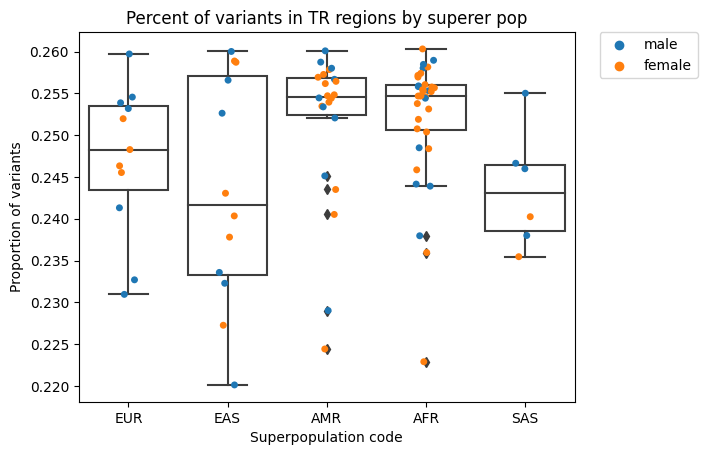

In [134]:

meta['pct_tr_vars'] = pct_tr_per_sample.set_index('sample')['pct_tr']

PROPS = {
    'boxprops':{'facecolor':'none'}#, 'edgecolor':'red'},
    #'medianprops':{'color':'green'},
    #'whiskerprops':{'color':'blue'},
    #'capprops':{'color':'yellow'}
}
p = sb.boxplot(data=meta, x="Superpopulation code", y="pct_tr_vars", **PROPS)
p = sb.stripplot(data=meta, x="Superpopulation code", y="pct_tr_vars", hue="Sex")
import matplotlib.pyplot as plt
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
_ = p.set(title="Percent of variants in TR regions by superer pop", ylabel="Proportion of variants")


In [161]:
from scipy.stats import pearsonr

In [162]:
pearsonr([1, 2, 3, 4], [21.4, 36.6, 66.6, 72.2])

PearsonRResult(statistic=0.9712685886323877, pvalue=0.02873141136761226)